<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [1]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data_new.xlsx'

In [3]:
import pandas as pd
df = pd.read_excel(path)
df.head(20)

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock
0,1,23,F,150,1,Satisfied with the service,Clothing,4
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86
2,3,45,F,800,0,Regular customer,Books,24
3,4,52,M,200,0,Occasional buyer,Beauty,10
4,5,29,F,300,1,High spender,Books,47
5,6,41,M,450,0,Average experience,Books,86
6,7,38,F,670,1,Prefers online shopping,Home Goods,69
7,8,27,M,120,1,New customer,Home Goods,0
8,9,50,F,500,0,Loyal to the brand,Electronics,86
9,10,33,M,750,1,High conversion rate,Clothing,45


In [5]:
from scipy import stats

df['Z_Score'] = stats.zscore(df['Total Spent'])

df['Outlier'] = df['Z_Score'].apply(lambda x: 'Yes' if abs(x) > 3 else 'No')
print(df[['Customer ID', 'Total Spent', 'Z_Score', 'Outlier']])

    Customer ID  Total Spent   Z_Score Outlier
0             1          150 -1.509850      No
1             2          600  0.785530      No
2             3          800  1.805699      No
3             4          200 -1.254808      No
4             5          300 -0.744724      No
5             6          450  0.020403      No
6             7          670  1.142589      No
7             8          120 -1.662876      No
8             9          500  0.275446      No
9            10          750  1.550657      No
10           11          610  0.836539      No
11           12          290 -0.795732      No
12           13          400 -0.234639      No
13           14          320 -0.642707      No
14           15          510  0.326454      No
15           16          350 -0.489681      No
16           17          550  0.530488      No
17           18          700  1.295615      No
18           19          250 -0.999766      No
19           20          400 -0.234639      No


In [6]:
from sklearn.decomposition import PCA

numerical_features = df[['Age', 'Total Spent', 'Stock']]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_features)


df['PCA_1'] = pca_result[:, 0]
df['PCA_2'] = pca_result[:, 1]

print(df[['PCA_1', 'PCA_2']].head())

        PCA_1      PCA_2
0 -298.962236 -18.615038
1  156.612775  23.208938
2  350.480651 -56.370716
3 -248.309328 -18.010862
4 -145.703246  10.855235


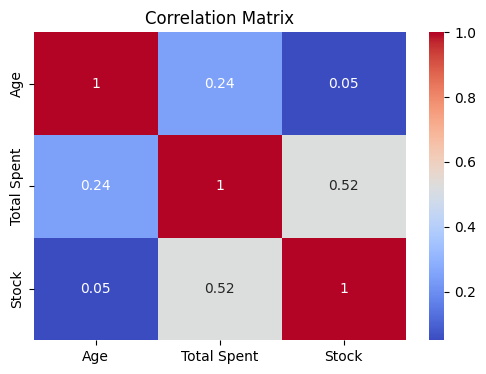

In [7]:
correlation_matrix = df[['Age', 'Total Spent', 'Stock']].corr()

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
avg_spending_per_category = df.groupby('Purchased Category')['Total Spent'].mean()
print(avg_spending_per_category)

Purchased Category
Beauty         400.000000
Books          470.000000
Clothing       533.333333
Electronics    420.000000
Home Goods     418.000000
Name: Total Spent, dtype: float64


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Normalized_Total_Spent', 'Normalized_Stock']] = scaler.fit_transform(df[['Total Spent', 'Stock']])
print(df[['Total Spent', 'Normalized_Total_Spent', 'Stock', 'Normalized_Stock']].head())

   Total Spent  Normalized_Total_Spent  Stock  Normalized_Stock
0          150                0.044118      4          0.043478
1          600                0.705882     86          0.934783
2          800                1.000000     24          0.260870
3          200                0.117647     10          0.108696
4          300                0.264706     47          0.510870


In [12]:
conversion_crosstab = pd.crosstab(df['Gender'], df['Converted'], normalize='index')
print(conversion_crosstab)

Converted         0         1
Gender                       
F          0.363636  0.636364
M          0.444444  0.555556


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x = df[['Age', 'Total Spent', 'Stock']]
y = df['Converted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.25


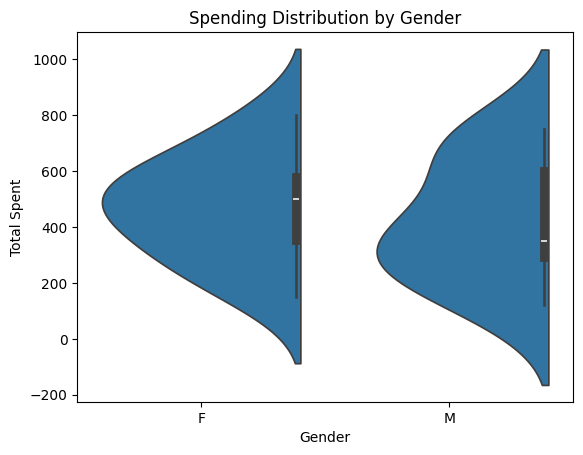

In [16]:
sns.violinplot(x='Gender', y='Total Spent', data=df, split=True)
plt.title('Spending Distribution by Gender')
plt.show()

In [17]:
from sklearn.feature_selection import RFE

rfe = RFE(tree_model, n_features_to_select=2)
rfe.fit(x_train, y_train)

print("Selected features:", x.columns[rfe.support_])

Selected features: Index(['Age', 'Stock'], dtype='object')


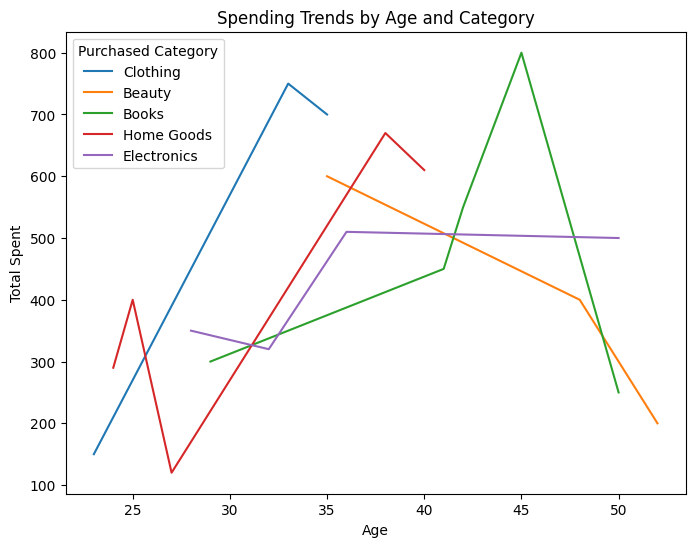

In [18]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Total Spent', hue='Purchased Category', data=df)
plt.title('Spending Trends by Age and Category')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x,y)


print(f'Original dataset shape: {y.value_counts()}')
print(f'Resampled dataset shape: {pd.Series(y_smote).value_counts()}')

Original dataset shape: Converted
1    12
0     8
Name: count, dtype: int64
Resampled dataset shape: Converted
1    12
0    12
Name: count, dtype: int64


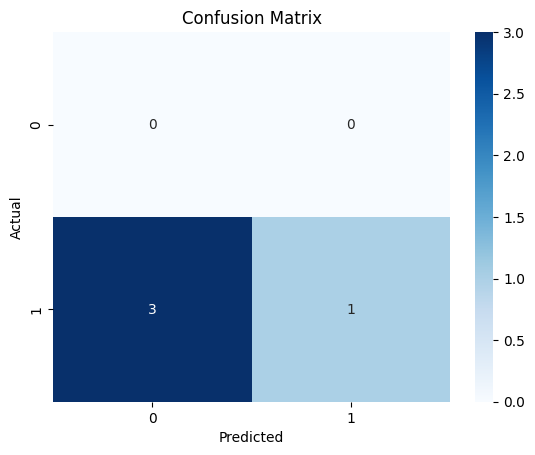

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

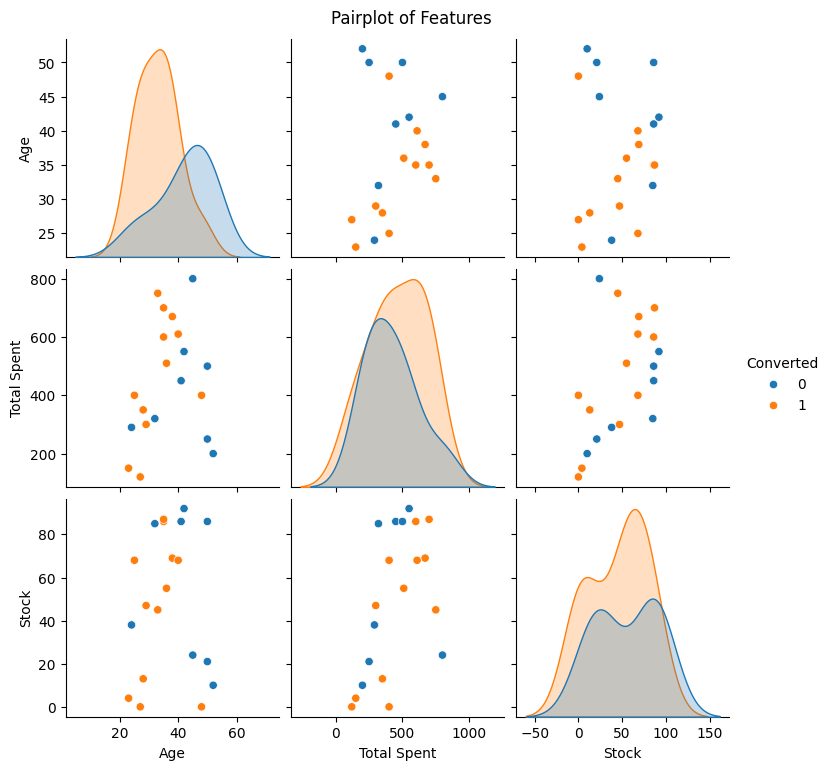

In [24]:
sns.pairplot(df[['Age', 'Total Spent', 'Stock', 'Converted']], hue='Converted')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

Age            0.351946
Stock          0.350429
Total Spent    0.297625
dtype: float64


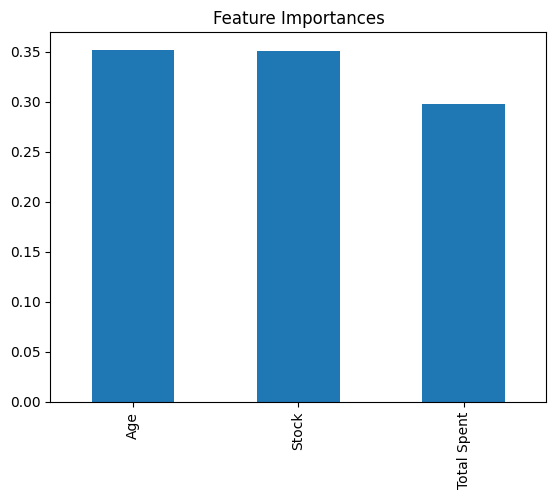

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importances)



feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [26]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(df[['Total Spent', 'Age']])


anomalies = df[df['Anomaly'] == -1]
print(anomalies[['Customer ID', 'Age', 'Total Spent', 'Anomaly']])

   Customer ID  Age  Total Spent  Anomaly
2            3   45          800       -1
3            4   52          200       -1
